In [2]:
# from pytorch example: https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
import torch
import torchvision
import torchvision.transforms as transforms
from tqdm import trange
%pylab inline

ModuleNotFoundError: No module named 'matplotlib'

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

bs = 4

train = torchvision.datasets.CIFAR10(root='/tmp', train=True, download=True, transform=transform)
trainload = torch.utils.data.DataLoader(train, batch_size=bs, shuffle=True, num_workers=2)

test = torchvision.datasets.CIFAR10(root='/tmp', train=False, download=True, transform=transform)
testload = torch.utils.data.DataLoader(test, batch_size=bs, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


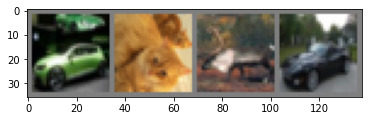

  car   cat  deer   car


In [3]:
def imshow(img):
    img = img/2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
dataiter = iter(trainload)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(bs)))

In [4]:
import torch.nn as nn
import torch.nn.functional as F

class CIFARCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [7]:
net = CIFARCNN()

import torch.optim as optim

lossf = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in (t := trange(100)):
    running_loss = 0.
    for i, data in enumerate(trainload, 0):
        X, Y = data
        
        #zero the gradient
        optimizer.zero_grad()
        
        #forward, backward, optim
        out = net(X)
        loss = lossf(out, Y)
        loss.backward()
        optimizer.step()
        
        #stats
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            t.set_description("loss: %.2f" % (running_loss/2000))
            running_loss = 0.

loss: 0.74: 100%|██████████| 100/100 [1:32:14<00:00, 55.34s/it]


In [ ]:
PATH = '/tmp/cifar_net.pt'
torch.save(net, PATH)

In [8]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testload:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 56 %
